In [1]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import os
#warnings.filterwarnings("ignore", category=DeprecationWarning) 
#%matplotlib inline

# if need to show all data in columns

In [2]:
pd.set_option('display.max_colwidth', -1)

# generate data

In [ ]:
#cores
N=16
#secs
M=1024
x={}

for i in range(1,N+1):
    x[i]=[]
    for j in range(1,M+1):
        x[i].append(j/i)
df = pd.DataFrame(data=x,index=range(1,M+1))
df

In [ ]:
df.to_csv("output.csv")

# Read

In [ ]:
data = pd.read_csv('output.csv',index_col=['Unnamed: 0'])
data.sample(10)

In [ ]:
data.head()

In [ ]:
data_train=pd.DataFrame(columns=['program','cores','paramsvector','time'])

In [ ]:
k=0
dlist=[]
for i in range(0,len(data)):
    for j in range(1,len(data.columns)+1):
        dict={}
        dict['time']=data.iloc[i][str(j)]
        dict['cores']=j
        dict['paramsvector']=[i+1]
        cmd="sh -lc \'python3 run.py {} {} > /output/test.txt\'".format(dict['paramsvector'][0],dict['cores'])
        dict['program']={'image': 'als23/sleep:latest', 'cmd': cmd}
        data_train.loc[k]=dict
        dlist.append(dict)
        k+=1

In [ ]:
data_train.sample(10)

In [ ]:
with open("outputSleepSim.json", "w") as f:
    json.dump(dlist, f)

# Monte-Carlo

In [30]:
path = "../data/outputMC.json"

def load_data():
    if not os.path.isfile(path):
        return []
    with open(path, "r") as json_data:
        statelist = json.load(json_data)
        if isinstance(statelist, list):
            return statelist
        return []

In [31]:
d=load_data()
df=pd.DataFrame.from_records(d,index=range(1,len(d)+1))

# statelist=[]
# with open("f.json", "r") as json_data:
#     statelist = json.load(json_data)
    
df=pd.DataFrame.from_records(d,index=range(1,len(d)+1))
df.head()

,cores,paramsvector,program,time
1,5,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 5 > /output/test.txt''}",1.428898
2,10,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 10 > /output/test.txt''}",1.132659
3,2,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 2 > /output/test.txt''}",3.219215
4,3,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 3 > /output/test.txt''}",2.211859
5,9,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 9 > /output/test.txt''}",0.967428


In [32]:
df.describe()

,cores,time
count,16.000000,16.000000
mean,8.500000,1.638507
std,4.760952,1.396787
min,1.000000,0.787860
25%,4.750000,0.872576
50%,8.500000,1.174381
75%,12.250000,1.525557
max,16.000000,6.310714


# Sort

In [33]:
df=df.sort_values(by=["cores"])

df.head()

,cores,paramsvector,program,time
8,1,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 1 > /output/test.txt''}",6.310714
3,2,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 2 > /output/test.txt''}",3.219215
4,3,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 3 > /output/test.txt''}",2.211859
6,4,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 4 > /output/test.txt''}",1.682031
1,5,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 5 > /output/test.txt''}",1.428898


In [34]:
df = df.reset_index(drop=True)
pd.set_option('display.max_colwidth', -1)
df.index=range(1,len(d)+1)

df.head()

,cores,paramsvector,program,time
1,1,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 1 > /output/test.txt''}",6.310714
2,2,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 2 > /output/test.txt''}",3.219215
3,3,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 3 > /output/test.txt''}",2.211859
4,4,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 4 > /output/test.txt''}",1.682031
5,5,[7207200],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 7207200 5 > /output/test.txt''}",1.428898


#plot1=df.time.plot.line(figsize=(50,30))
#fig1 = plot1.get_figure()
#fig1.savefig('linefig1.png', dpi=100)

# select data from dataset

In [ ]:
# expand df.tags into its own dataframe
tags = df['paramsvector'].apply(pd.Series)

# rename each variable is tags
tags = tags.rename(columns = lambda x : 'param_' + str(x))

# view the tags dataframe
tags.head()

In [ ]:
# join the tags dataframe back to the original dataframe
dfexpanded=pd.concat([df[:], tags[:]], axis=1)
dfexpanded.head()

In [ ]:
cond=dfexpanded['param_0']==60
vyborka=dfexpanded[cond]
vyborka.reset_index(drop=True)
vyborka.index=vyborka.cores

# Plot

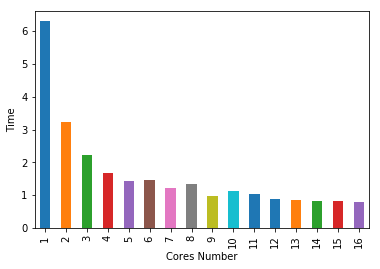

In [35]:
plot2=df.time.plot.bar()
fig2 = plot2.get_figure()
plt.xlabel('Cores Number')
plt.ylabel('Time')
fig2.savefig('barfig4.png', dpi=100)

In [ ]:
plt.plot(vyborka.cores, vyborka.time, 'o')

plt.plot(vyborka.cores * vyborka.time)

# Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr
import json

clf=rfr()

In [ ]:
X = df.drop(['time'],axis=1)
y = df.time
X.head()

In [ ]:
X.program=X.program.apply(lambda x: json.dumps(x))
X.paramsvector=X.paramsvector.apply(lambda x: x[0])

data_train = X
data_train.head()

In [ ]:
from sklearn import preprocessing

In [ ]:
features = ['program']
le= preprocessing.LabelEncoder()

In [ ]:
df_combined = X[features]
    
for feature in features:
    le = le.fit(df_combined[feature])
    data_train[feature] = le.transform(df_combined[feature])
    
data_train.head()

In [ ]:
clf.fit(data_train,y)

In [ ]:
to_predict=[{"cores": 4, "program": {"image": "als23/sleep:latest", "cmd": "sh -lc 'python3 run.py 60 4 > /output/test.txt'"},
                         "paramsvector": [60]}]

In [ ]:
data_test = pd.DataFrame.from_records(to_predict)
data_test.program=data_test.program.apply(lambda x: json.dumps(x))
data_test.paramsvector=data_test.paramsvector.apply(lambda x: x[0])
data_test.head()

In [ ]:
df_combined = data_test[features]

for feature in features:
    #le = le.fit(df_combined[feature])
    data_test[feature] = le.transform(df_combined[feature])

data_test.head()

In [ ]:
clf.predict(data_test)